In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sb

In [3]:
data = pd.read_csv(r"C:\mansi\study\MSBA\Field project\FAISS\final_edited.csv")
data

,index,name,GPA,GRE,Admission_school,Admission_major,graduated_from,Joint_university,undergraduate_major,manually_mapped_teacher
0,726,meishiedu108,Nan,Nan,Case Western Reserve University,Accounting,Zhongnan University of Economics and Law,NaN,Accounting,NaN
1,792,meishiedu174,Nan,Nan,Case Western Reserve University,Accounting,Zhongnan University of Economics and Law,NaN,Accounting,NaN
2,434,cheersyou190,3.5,Nan,Cornell University,Accounting,University of Iowa,NaN,in,NaN
3,465,cheersyou212,3.7,Nan,Cornell University,Accounting,"University of California, Irvine",NaN,in,"中方顾问 Eva Pan, teacher0, teacher1, 规划顾问 朱彤"
4,742,meishiedu124,3.17,Nan,Lehigh University,Accounting,"A 211, 985 university",NaN,Accounting major,NaN
...,...,...,...,...,...,...,...,...,...,...
1076,705,meishiedu87,Nan,Nan,York University,NaN,Southwest University of Economics and Law,NaN,finance,NaN
1077,432,cheersyou188,2.8,Nan,NaN,NaN,"University of California, Santa Barbara",NaN,in,"胡老师 Eric, 何老师 Patrick"
1078,735,meishiedu117,2.11,318,NaN,NaN,University of Iowa,NaN,Environmental Engineering,NaN
1079,745,meishiedu127,3.3,307,NaN,NaN,A 985 University in Beijing,NaN,Major in Chemistry,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    1081 non-null   int64 
 1   name                     1081 non-null   object
 2   GPA                      1080 non-null   object
 3   GRE                      1080 non-null   object
 4   Admission_school         1071 non-null   object
 5   Admission_major          719 non-null    object
 6   graduated_from           1080 non-null   object
 7   Joint_university         12 non-null     object
 8   undergraduate_major      1081 non-null   object
 9   manually_mapped_teacher  541 non-null    object
dtypes: int64(1), object(9)
memory usage: 84.6+ KB


In [5]:
df = data

In [6]:
for i in range (len(df["GRE"])):
    if(isinstance(df["GRE"][i],str)):
        if(df["GRE"][i]!="Nan"):
            df["GRE"][i]=float(df["GRE"][i])
        else:
            df["GRE"][i]=312
            
for i in range (len(df["GPA"])):
    if(isinstance(df["GPA"][i],str)):
        if(df["GPA"][i]!="Nan"):
            df["GPA"][i]=float(df["GPA"][i])
        else:
            df["GPA"][i]=3.76

In [25]:
df

,index,name,GPA,GRE,Admission_school,Admission_major,graduated_from,Joint_university,undergraduate_major,manually_mapped_teacher
0,726,meishiedu108,3.76,312,Case Western Reserve University,Accounting,Zhongnan University of Economics and Law,NaN,Accounting,NaN
1,792,meishiedu174,3.76,312,Case Western Reserve University,Accounting,Zhongnan University of Economics and Law,NaN,Accounting,NaN
2,434,cheersyou190,3.5,312,Cornell University,Accounting,University of Iowa,NaN,in,NaN
3,465,cheersyou212,3.7,312,Cornell University,Accounting,"University of California, Irvine",NaN,in,"中方顾问 Eva Pan, teacher0, teacher1, 规划顾问 朱彤"
4,742,meishiedu124,3.17,312,Lehigh University,Accounting,"A 211, 985 university",NaN,Accounting major,NaN
...,...,...,...,...,...,...,...,...,...,...
1076,705,meishiedu87,3.76,312,York University,NaN,Southwest University of Economics and Law,NaN,finance,NaN
1077,432,cheersyou188,2.8,312,NaN,NaN,"University of California, Santa Barbara",NaN,in,"胡老师 Eric, 何老师 Patrick"
1078,735,meishiedu117,2.11,318.0,NaN,NaN,University of Iowa,NaN,Environmental Engineering,NaN
1079,745,meishiedu127,3.3,307.0,NaN,NaN,A 985 University in Beijing,NaN,Major in Chemistry,NaN


<AxesSubplot:xlabel='GRE', ylabel='Admission_major'>

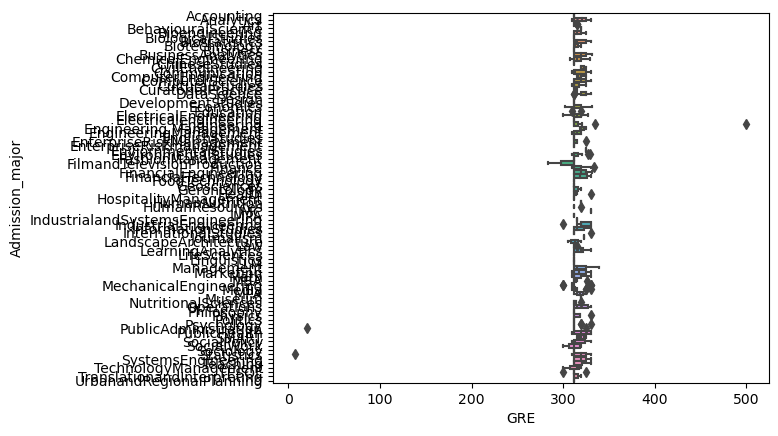

In [81]:
sb.boxplot( x = 'GRE',y = 'Admission_major', data = data )

<AxesSubplot:xlabel='GPA', ylabel='Admission_major'>

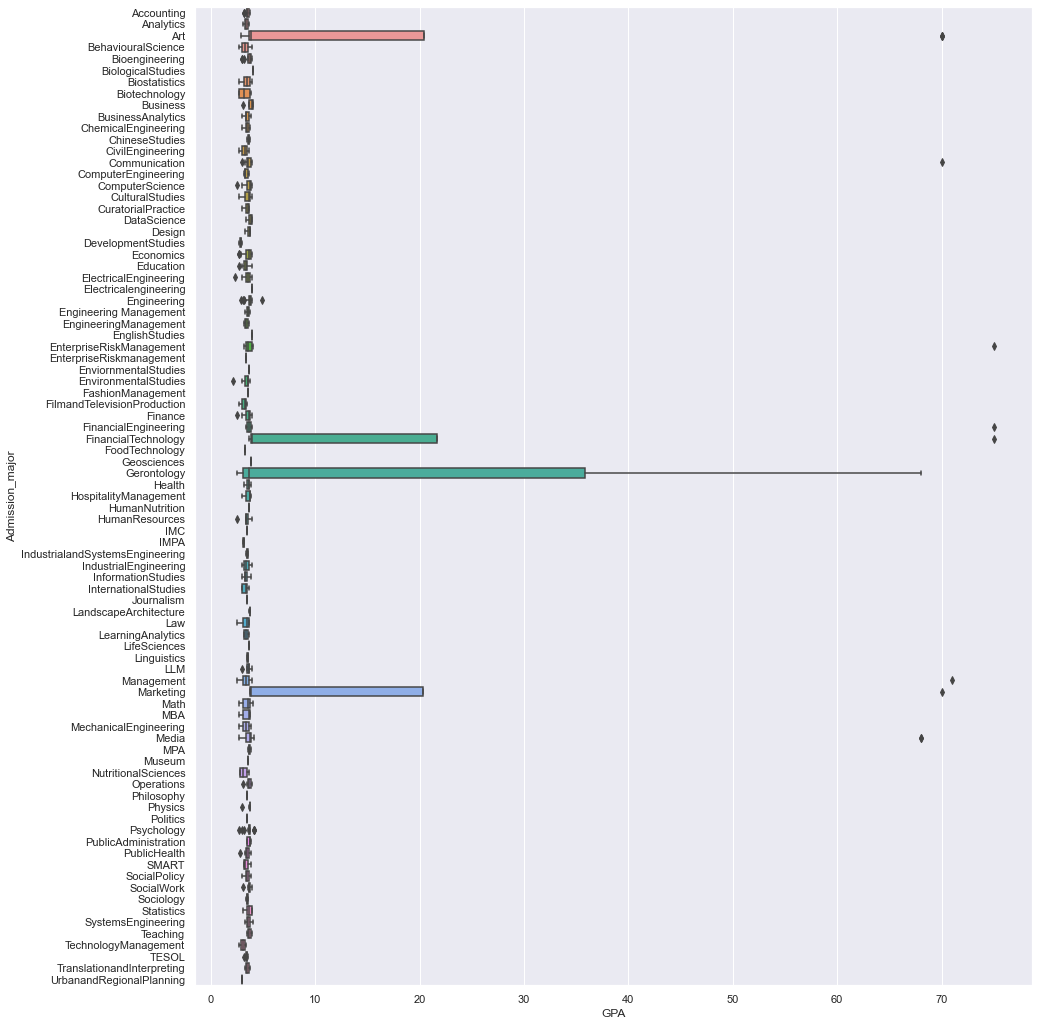

In [10]:
sb.set(rc={'figure.figsize':(15,18)}) #set width and height

sb.boxplot(x ='GPA', y ='Admission_major', data = data)

In [27]:
df = pd.get_dummies(df, columns=['Admission_major'], drop_first = True)
df = pd.get_dummies(df, columns=['graduated_from'], drop_first = True)
df = pd.get_dummies(df, columns=['manually_mapped_teacher'], drop_first = True)

In [28]:
df

,index,name,GPA,GRE,Admission_school,Joint_university,undergraduate_major,Admission_major_Analytics,Admission_major_Art,Admission_major_BehaviouralScience,...,"manually_mapped_teacher_曦 王, 升学顾问 梁爽 , 宏丹 章, teacher9","manually_mapped_teacher_林老师 Judy, Anni 顾安妮 资深顾问, teacher0, teacher7",manually_mapped_teacher_江顺意,manually_mapped_teacher_王圆元（西安）,"manually_mapped_teacher_王杨竞 资深顾问,","manually_mapped_teacher_美方顾问 Tyler, Amber Wang","manually_mapped_teacher_胡老师 Eric, 何老师 Patrick","manually_mapped_teacher_许老师 Jocelyn, 杨老师 Diane, 孟老师 Yuki, 规划顾问 郑馨哲 , 升学顾问 严筱璇 , 刘腾老师 资深顾问, 姜宇杰 规划导师 Sherry 孙烯铷 , Jonathan Javier 美国战略顾问, 前招生官 Rhody Davis , 石安妮 , Valerie Zhang, 毛至博 联合创始人, Benjamin Schwartz, Charlie , 规划顾问 陈镜浩 , 资深顾问 代雪娇, 覃秋语",manually_mapped_teacher_首席导师 Zihao,"manually_mapped_teacher_高级学术导师 Alex Zhang, teacher9"
0,726,meishiedu108,3.76,312,Case Western Reserve University,NaN,Accounting,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,792,meishiedu174,3.76,312,Case Western Reserve University,NaN,Accounting,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,434,cheersyou190,3.5,312,Cornell University,NaN,in,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,465,cheersyou212,3.7,312,Cornell University,NaN,in,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,742,meishiedu124,3.17,312,Lehigh University,NaN,Accounting major,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,705,meishiedu87,3.76,312,York University,NaN,finance,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1077,432,cheersyou188,2.8,312,NaN,NaN,in,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1078,735,meishiedu117,2.11,318.0,NaN,NaN,Environmental Engineering,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1079,745,meishiedu127,3.3,307.0,NaN,NaN,Major in Chemistry,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X=df
X=X.drop(['name'], axis=1)
#X=X.drop(['manually_mapped_teacher'], axis=1)
X=X.drop(['Joint_university'], axis=1)
X=X.drop(['Admission_school'], axis=1)
X=X.drop(['undergraduate_major'], axis=1)
X=X.drop(['index'], axis=1)

In [30]:
X

,GPA,GRE,Admission_major_Analytics,Admission_major_Art,Admission_major_BehaviouralScience,Admission_major_Bioengineering,Admission_major_BiologicalStudies,Admission_major_Biostatistics,Admission_major_Biotechnology,Admission_major_Business,...,"manually_mapped_teacher_曦 王, 升学顾问 梁爽 , 宏丹 章, teacher9","manually_mapped_teacher_林老师 Judy, Anni 顾安妮 资深顾问, teacher0, teacher7",manually_mapped_teacher_江顺意,manually_mapped_teacher_王圆元（西安）,"manually_mapped_teacher_王杨竞 资深顾问,","manually_mapped_teacher_美方顾问 Tyler, Amber Wang","manually_mapped_teacher_胡老师 Eric, 何老师 Patrick","manually_mapped_teacher_许老师 Jocelyn, 杨老师 Diane, 孟老师 Yuki, 规划顾问 郑馨哲 , 升学顾问 严筱璇 , 刘腾老师 资深顾问, 姜宇杰 规划导师 Sherry 孙烯铷 , Jonathan Javier 美国战略顾问, 前招生官 Rhody Davis , 石安妮 , Valerie Zhang, 毛至博 联合创始人, Benjamin Schwartz, Charlie , 规划顾问 陈镜浩 , 资深顾问 代雪娇, 覃秋语",manually_mapped_teacher_首席导师 Zihao,"manually_mapped_teacher_高级学术导师 Alex Zhang, teacher9"
0,3.76,312,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.76,312,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.5,312,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.7,312,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.17,312,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,3.76,312,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1077,2.8,312,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1078,2.11,318.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1079,3.3,307.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Columns: 403 entries, GPA to manually_mapped_teacher_高级学术导师 Alex Zhang, teacher9
dtypes: object(2), uint8(401)
memory usage: 440.3+ KB


In [34]:
import faiss 
index = faiss.IndexFlatL2(403)   # build the index
print(index.is_trained)

True


In [35]:
dt=X.to_numpy()
dt=(np.ascontiguousarray(dt))
nt=np.float32(dt)
index.add(nt)                 # add vectors to the index
print(index.ntotal)

1081


In [36]:
dt

array([[3.76, 312, 0, ..., 0, 0, 0],
       [3.76, 312, 0, ..., 0, 0, 0],
       [3.5, 312, 0, ..., 0, 0, 0],
       ...,
       [2.11, 318.0, 0, ..., 0, 0, 0],
       [3.3, 307.0, 0, ..., 0, 0, 0],
       [3.76, 312, 0, ..., 0, 0, 0]], dtype=object)

In [37]:
k = 1                          # we want to see 4 nearest neighbors
D, I = index.search(nt[:100], k) # sanity check
print(I) 
score=[]
for i in range (len(I)):
    if(i not in I[i]):
        score.append(0)
    else:
        score.append(1)
print("The precision of top-1 accuracy is {}".format(np.mean(score)))

[[ 0]
 [ 0]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 6]
 [10]
 [ 6]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [23]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [33]
 [33]
 [36]
 [37]
 [38]
 [36]
 [36]
 [41]
 [38]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [49]
 [51]
 [52]
 [53]
 [47]
 [52]
 [46]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [62]
 [64]
 [65]
 [65]
 [65]
 [68]
 [64]
 [70]
 [71]
 [72]
 [72]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]
 [81]
 [82]
 [83]
 [84]
 [85]
 [86]
 [87]
 [88]
 [89]
 [90]
 [88]
 [92]
 [93]
 [94]
 [79]
 [96]
 [97]
 [98]
 [99]]
The precision of top-1 accuracy is 0.8


In [68]:
k = 4                         # we want to see 4 nearest neighbors
D, I = index.search(nt[:1000], k) # sanity check
print(I) 
score=[]
for i in range (len(I)):
    if(i not in I[i]):
        score.append(0)
    else:
        score.append(1)
print("The precision of top-5 accuracy is {}".format(np.mean(score)))

[[   1  808  924    0]
 [   1  808  924    0]
 [   2  610  799  756]
 ...
 [ 820  997 1007  883]
 [ 998 1050  856   10]
 [ 742  895  917  898]]
The precision of top-5 accuracy is 0.965


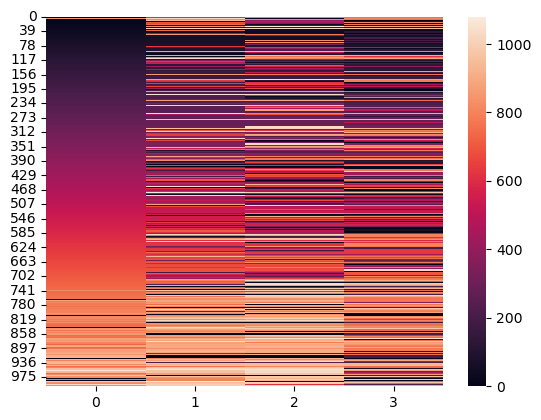

In [69]:
hm = sb.heatmap(data = I)

In [59]:
for i in range (len(I)):
    print(data.iloc[I[i]])
    

     index          name   GPA  GRE                 Admission_school  \
1      792  meishiedu174  3.76  312  Case Western Reserve University   
808    726  meishiedu108  3.76  312               Fordham University   
924    726  meishiedu108  3.76  312                Tulane University   
0      726  meishiedu108  3.76  312  Case Western Reserve University   

    Admission_major                            graduated_from  \
1        Accounting  Zhongnan University of Economics and Law   
808             NaN  Zhongnan University of Economics and Law   
924             NaN  Zhongnan University of Economics and Law   
0        Accounting  Zhongnan University of Economics and Law   

    Joint_university undergraduate_major manually_mapped_teacher  
1                NaN          Accounting                     NaN  
808              NaN          Accounting                     NaN  
924              NaN          Accounting                     NaN  
0                NaN          Accounting     

In [78]:
data.iloc[I[871]]

,index,name,GPA,GRE,Admission_school,Admission_major,graduated_from,Joint_university,undergraduate_major,manually_mapped_teacher
800,809,meishiedu191,3.3,312,Duke University,NaN,Beijing University,NaN,In,Wang
871,809,meishiedu191,3.3,312,New York University,NaN,Beijing University,NaN,In,Wang
930,809,meishiedu191,3.3,312,UC Berkeley,NaN,Beijing University,NaN,In,Wang
884,809,meishiedu191,3.3,312,Northwestern University,NaN,Beijing University,NaN,In,Wang
